# ISLP - Chapter 3 - Exercise 9
### Author: pzuehlke

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import summarize

__9 (a)__:

In [18]:
auto = load_data("Auto")
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


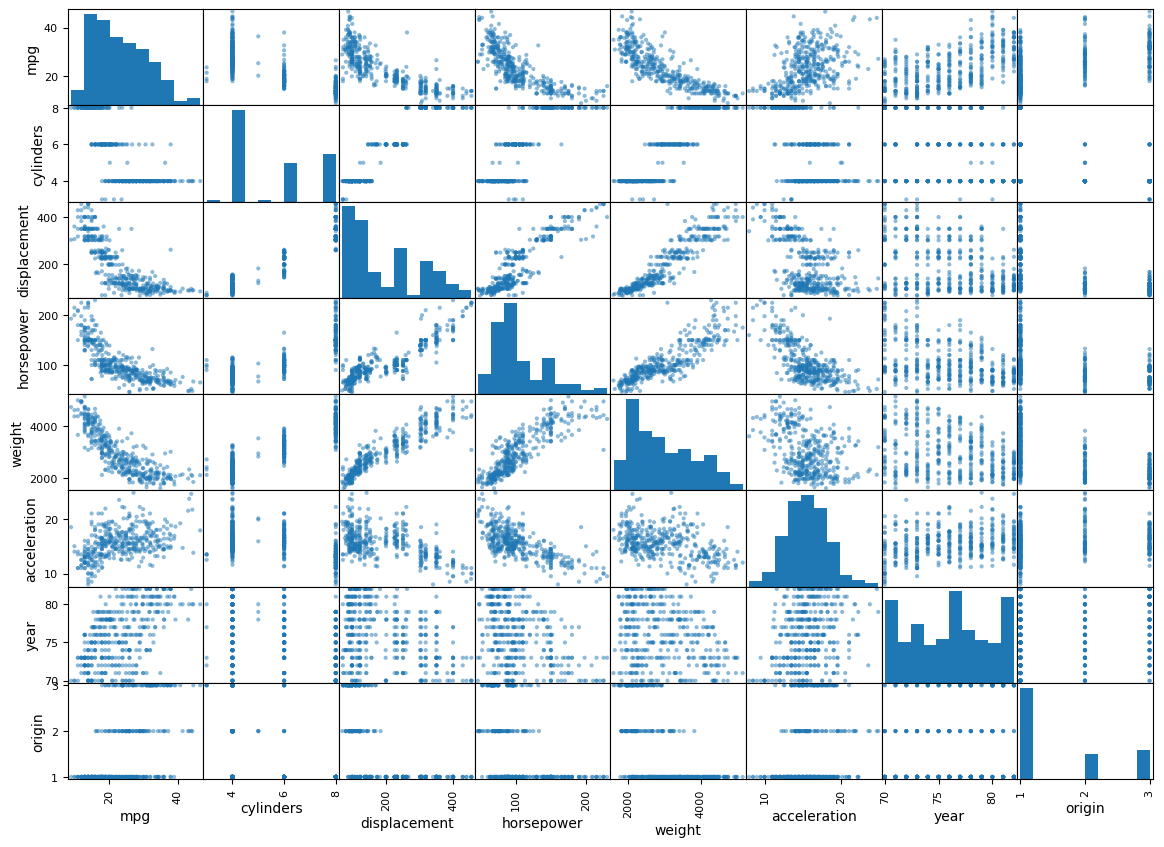

In [19]:
pd.plotting.scatter_matrix(auto, figsize=(14, 10));

__9 (b):__ 

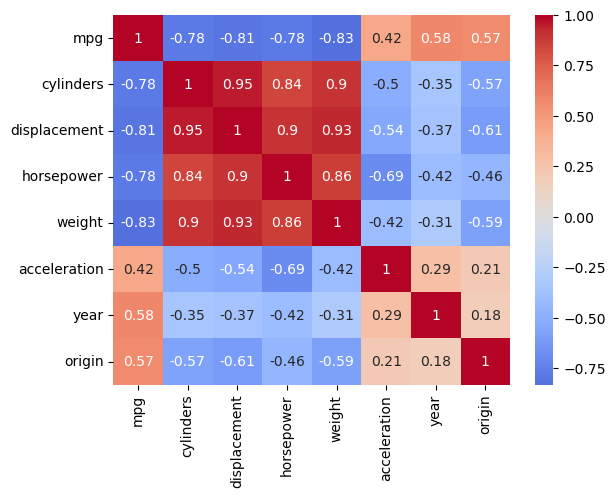

In [ ]:
corr_matrix = auto.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

In [21]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


__9 (c):__

In [22]:
y = auto["mpg"]  # response
X = auto.drop(columns=["mpg"])  # everything else to be used as a predictor
X = sm.add_constant(X)  # intercept term
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          2.04e-139
Time:                        15:20:19   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

(i) Per the summary table, the $ F $-statistic for the whole model is huge, and
the associated $ p $-value is infinitesimal. Hence we can safely conclude that
there is a definite relationship between the response and the predictors.

(ii) The following predictors do not appear to be significant for this model:
`cylinders`, `horsepower` and `acceleration`. The `displacement` predictor is
probably significant. The remaining ones (`const` (the intercept), `weight`,
`year` and `origin`) have $ p $-value very close to $ 0 $, hence they are
statistically significant when all predictors are taken into account.

(iii) The $ 0.7508 $ coefficient multiplying `year` suggests that newer cars are
more efficient, since they achieve more miles per gallon. This is to be expected
from advances in technology leading to more efficient motors.


__9 (d)__: The funnel shape of the residual plot indicates heteroscedasticity.

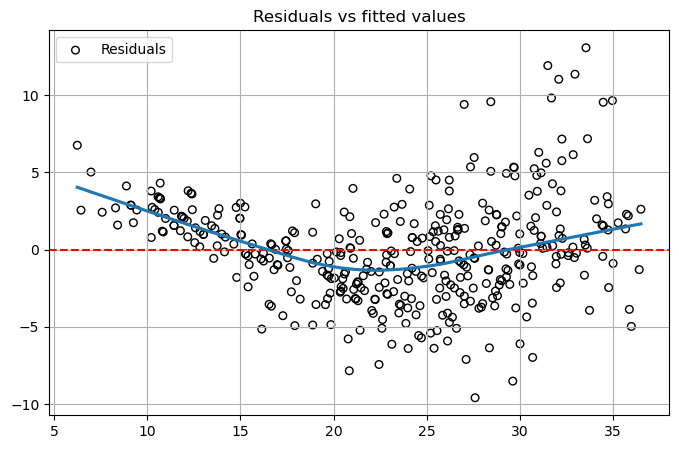

In [32]:
fitted_values = model.fittedvalues
residuals = model.resid

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(fitted_values, residuals, color="black", facecolor="none", label="Residuals", s=30)
ax.axhline(y=0, color="red", linestyle="dashed", linewidth=1.5)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residuals")
sns.regplot(x=fitted_values, y=residuals, data=auto, scatter=False, lowess=True)

ax.set_title("Residuals vs fitted values")
ax.legend()
ax.grid(True)
plt.show()

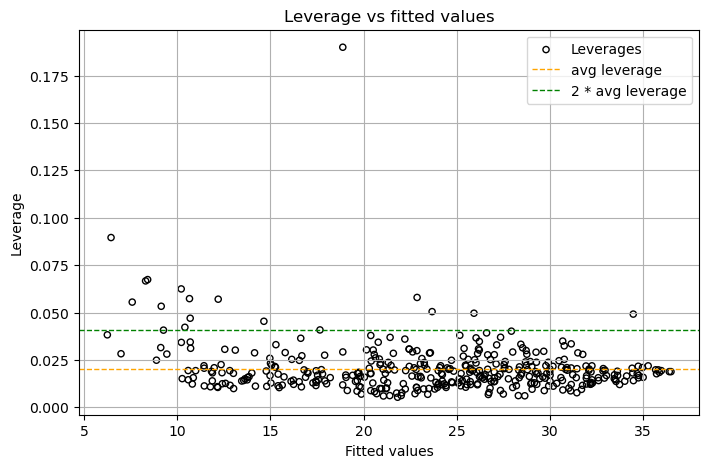

In [10]:
# Leverage (Hat matrix diagonal)
influence = model.get_influence()
leverage = influence.hat_matrix_diag
cooks_d = influence.cooks_distance[0]


fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(fitted_values, leverage, color="black", facecolors="none", label="Leverages", s=20)
ax.axhline(y=np.mean(leverage), color="orange", linestyle="--", lw=1,
            label="avg leverage")
ax.axhline(y=2 * np.mean(leverage), color="green", linestyle="--", lw=1,
            label="2 * avg leverage")
ax.set_xlabel("Fitted values")
ax.set_ylabel("Leverage")

ax.set_title("Leverage vs fitted values")
ax.legend()
ax.grid(True)
plt.show()

In [11]:
n, p = X.shape  # n = num of observations, p = num of predictors (incl. intercept)
leverage_threshold = 2 * (p / n)
high_leverage_points = np.where(leverage > leverage_threshold)[0]
print(f"High leverage threshold: {leverage_threshold}") 
print("High leverage points (indices):", high_leverage_points)

High leverage threshold: 0.04081632653061224
High leverage points (indices): [  6   7   8  12  13  25  26  27  28  93  94 115 209 297 298 359 388]


__9 (e)__: 

In [12]:
import statsmodels.formula.api as smf

# A model with predictors horsepower, weight and their product (following the
# hierarchical principle):
model = smf.ols("mpg ~ horsepower * weight", data=auto).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     384.8
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          7.26e-116
Time:                        15:17:39   Log-Likelihood:                -1090.7
No. Observations:                 392   AIC:                             2189.
Df Residuals:                     388   BIC:                             2205.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            63.5579      2.34

__9 (f)__: 

In [13]:
# Define the formula with square terms for
# `displacement`, `horsepower`, `weight`, and `acceleration`:
formula = ("mpg ~ cylinders + displacement + I(displacement**2) + "
           "horsepower + I(horsepower**2) + "
           "weight + I(weight**2) + "
           "acceleration + I(acceleration**2) + "
           "year + origin")
model = smf.ols(formula, data=auto).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Wed, 05 Feb 2025   Prob (F-statistic):          1.75e-160
Time:                        15:17:41   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               20.1084 

The increase in adjusted $ R^2 $ from $ 0.818 $ (fully linear model) to $ 0.866
$ (quadratic model) suggests that adding the square terms for displacement,
horsepower, weight, and acceleration meaningfully improves the model's ability
to explain the variability in mpg, rather than just adding complexity. 

Moreover, the following plot shows that this new model is less heteroscedastic.

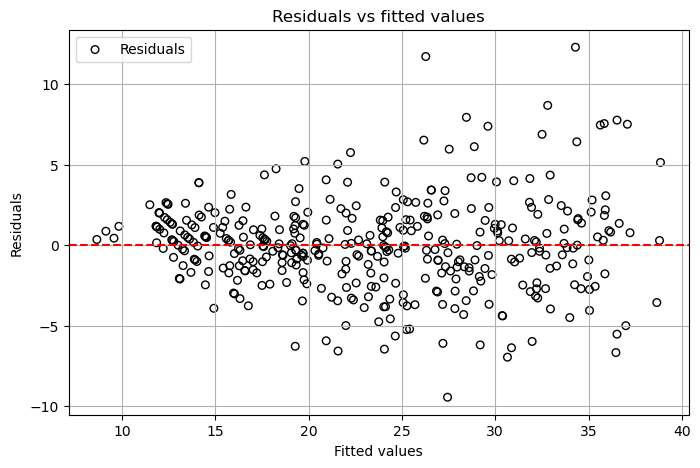

In [14]:
fitted_values = model.fittedvalues
residuals = model.resid

fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(fitted_values, residuals, color="black", facecolors='none', label="Residuals", s=30)
ax.axhline(y=0, color="red", linestyle="dashed", linewidth=1.5)
ax.set_xlabel("Fitted values")
ax.set_ylabel("Residuals")

ax.set_title("Residuals vs fitted values")
ax.legend()
ax.grid(True)
plt.show()

Glancing at the scattermatrix, one might think that our model should perhaps
include a term of the form $ e^{\text{acceleration}} $.
However, this term has a large $ p $-value and the $ R^2 $ does not improve:

In [64]:
# Modify the formula to include exp(acceleration)
formula = ("mpg ~ cylinders + displacement + I(displacement**2) + "
           "horsepower + I(horsepower**2) + "
           "weight + I(weight**2) + "
           "acceleration + I(acceleration**2) + I(np.exp(acceleration)) + "
           "year + origin")
model = smf.ols(formula, data=auto).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     211.6
Date:                Tue, 04 Feb 2025   Prob (F-statistic):          1.18e-159
Time:                        18:25:54   Log-Likelihood:                -961.16
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     379   BIC:                             2000.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Now notice that several terms have large $ p $-value, namely: `cylinders`, `displacement` and its square, besides $ e^{\text{acceleration}} $. Let's remove these and see if can get a better model.

In [71]:
formula = ("mpg ~ horsepower + I(horsepower**2) + "
           "weight + I(weight**2) + "
           "acceleration + I(acceleration**2) + "
           "year + origin")
model = smf.ols(formula, data=auto).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     318.2
Date:                Tue, 04 Feb 2025   Prob (F-statistic):          5.19e-164
Time:                        18:33:17   Log-Likelihood:                -962.47
No. Observations:                 392   AIC:                             1943.
Df Residuals:                     383   BIC:                             1979.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               21.4266 

Since the adjusted $ R^2 $ remains exactly the same after removing `displacement`,
`displacement`$ ^2 $, and `cylinders`, this suggests that these variables were not
contributing additional explanatory power to the model.